# The salaries of Data Scientists The model to predict the factors influencing the salaries of Data Scientists prediction

Summary
The aim of this study is to investigate the factors influencing the salaries of Data Scientists. To achieve this, a dataset containing various relevant variables was utilized. This report describes the exploratory analysis conducted to understand the relationship between these factors and Data Scientists' salaries


## Import libraries

In [3]:
# standard library imports
import pandas as pd
import numpy as np
import sklearn
import os


#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import fird-party libraries and modules

import wbdata
import datetime

from dotenv import load_dotenv
load_dotenv()

import json

import requests

from sklearn.pipeline import Pipeline as skl_pipeline

from sklearn.preprocessing import OneHotEncoder, PowerTransformer

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

import xgboost as xgb


# import joblib
# import requests
# import optuna
# from optuna.visualization.matplotlib import plot_param_importances
# import mlflow
# import json


# client = mlflow.MlflowClient(tracking_uri='http://127.0.0.1:8080')
# mlflow.set_tracking_uri='http://127.0.0.1:8080'



# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split, GridSearchCV 

# from sklearn.pipeline import Pipeline as skl_pipeline

# # from imblearn.pipeline import Pipeline as imb_pipeline
# # from imblearn.over_sampling import SMOTE






# # load metrics
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.metrics import PredictionErrorDisplay

# output format
pd.set_option('display.float_format', '{:.3f}'.format)
sklearn.set_config(transform_output='pandas')


# constant
RAND_ST = 345

# path to file
path_to_dataset = 'data/ds_salaries.csv'


In [1]:
# import dotenv
# dotenv.__version__

## Load dataset

In [4]:
df = pd.read_csv(path_to_dataset)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Dataset description

Dataset
To conduct this analysis, a dataset containing relevant information about Data Scientists was used. The dataset includes the following variables:

work_year:The year the salary was paid.

experience_level: The experience level in the job during the year.

EN > Entry-level / Junior
MI> Mid-level / Intermediate
SE > Senior-level / Expert
EX > Executive-level / Director

employment_type: The type of employment for the role.

PT > Part-time
FT > Full-time
CT > Contract
FL > Freelance
job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salaryinusd: The salary in USD.

employee_residence: Employee's primary country of residence during the work year as an ISO 3166 country code.

remote_ratio:The overall amount of work done remotely.

company_location: The country of the employer's main office or contracting branch.

company_size: The median number of people that worked for the company during the year.  



Data Science Job Salaries Dataset contains 11 columns, each are:

- `work_year`: The year the salary was paid.
- `experience_level`: The experience level in the job during the year
- `employment_type`: The type of employment for the role
- `job_title`: The role worked in during the year.
- `salary`: The total gross salary amount paid.
- `salary_currency`: The currency of the salary paid as an ISO 4217 currency code.
- `salaryinusd`: The salary in USD
- `employee_residence`: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- `remote_ratio`: The overall amount of work done remotely
- `company_location`: The country of the employer's main office or contracting branch
- `company_size`: The median number of people that worked for the company during the year

## EDA

In [5]:
df.describe() #ETL bing api course inflation graph model 

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000,3755.000,3755.000,3755.000
mean,2022.374,190695.572,137570.390,46.272
std,0.691,671676.501,63055.625,48.589
min,2020.000,6000.000,5132.000,0.000
25%,2022.000,100000.000,95000.000,0.000
50%,2022.000,138000.000,135000.000,0.000
75%,2023.000,180000.000,175000.000,100.000
max,2023.000,30400000.000,450000.000,100.000


In [6]:
df['job_title'].value_counts()  

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [7]:
df['work_year'].value_counts() #+ course + inflation by country + by world  + by us col + https://huggingface.co/WhereIsAI/UAE-Large-V1

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

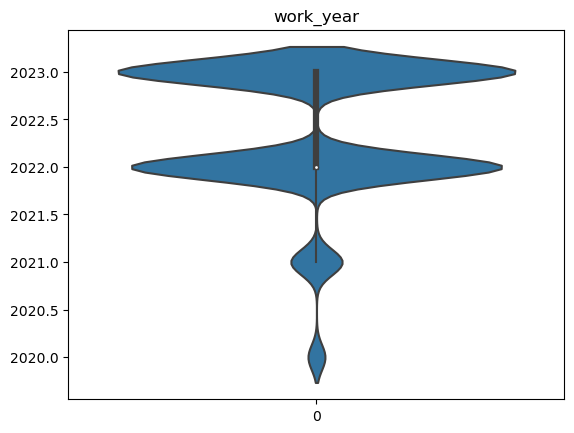

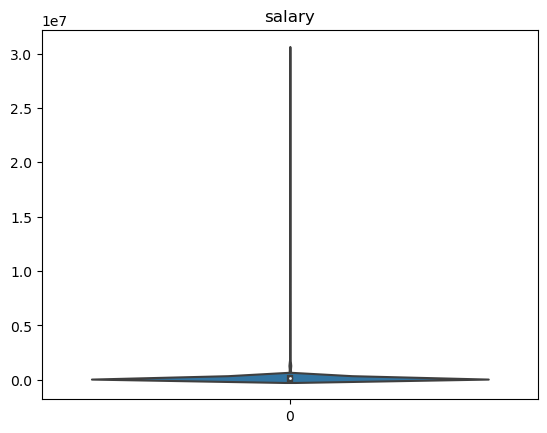

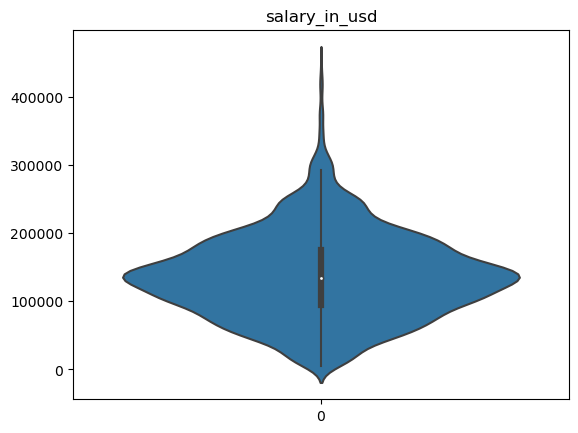

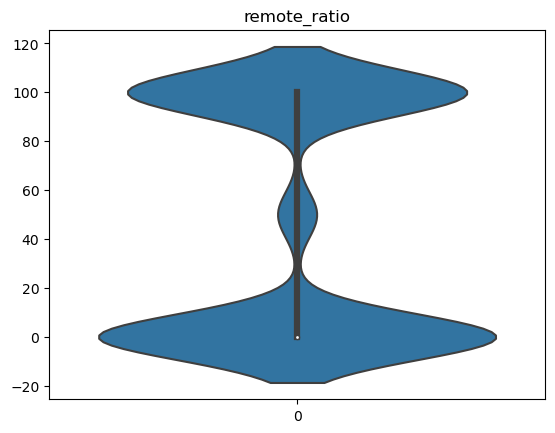

In [8]:
for col in df.select_dtypes(exclude='object').columns:
    sns.violinplot(df[col])
    plt.title(col)
    plt.show()

    # sns.violinplot(df[col])

In [9]:
# Dropping the 'salary' column from the dataframe
df.drop('salary', axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M


### API to get USD currency exchange rates

In [10]:
currency_list = ' ,'.join(df['salary_currency'].unique().tolist())
currency_list

'EUR ,USD ,INR ,HKD ,CHF ,GBP ,AUD ,SGD ,CAD ,ILS ,BRL ,THB ,PLN ,HUF ,CZK ,DKK ,JPY ,MXN ,TRY ,CLP'

In [59]:
def get_exchange_rates_history(date):
    api_url = f'http://api.exchangeratesapi.io/v1/{date}?access_key={os.getenv("API_KEY")}&cbase=EUR&symbols={currency_list}'
    
    try:
        response = requests.get(api_url)
        if response.status_code == 200:
            exchange_rates = pd.Series(response.json()['rates']).to_frame(name='rates').reset_index(names='currency')
            exchange_rates['date'] = int(pd.to_datetime(date).year)
            exchange_rates['usd_rate'] = (
                float(exchange_rates[exchange_rates['currency']=='USD']['rates']) / exchange_rates['rates']
                )
            
            return exchange_rates
    except requests.exceptions.RequestException as error:
        print(f"Error: {error}")
        

In [62]:
exchange_rates_2023 = get_exchange_rates_history('2023-01-01') # for every month you can code a loop
exchange_rates_2022 = get_exchange_rates_history('2022-01-01')
exchange_rates_2021 = get_exchange_rates_history('2021-01-01')
exchange_rates_2020 = get_exchange_rates_history('2020-01-01')

print(exchange_rates_2023, exchange_rates_2022, exchange_rates_2021, exchange_rates_2020)

/tmp/ipykernel_478408/1308789213.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(exchange_rates[exchange_rates['currency']=='USD']['rates']) / exchange_rates['rates']
/tmp/ipykernel_478408/1308789213.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(exchange_rates[exchange_rates['currency']=='USD']['rates']) / exchange_rates['rates']
/tmp/ipykernel_478408/1308789213.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(exchange_rates[exchange_rates['currency']=='USD']['rates']) / exchange_rates['rates']


   currency   rates  date  usd_rate
0       EUR   1.000  2023     1.070
1       USD   1.070  2023     1.000
2       INR  88.580  2023     0.012
3       HKD   8.351  2023     0.128
4       CHF   0.989  2023     1.082
5       GBP   0.885  2023     1.210
6       AUD   1.570  2023     0.682
7       SGD   1.433  2023     0.747
8       CAD   1.449  2023     0.739
9       ILS   3.776  2023     0.283
10      BRL   5.659  2023     0.189
11      THB  37.050  2023     0.029
12      PLN   4.682  2023     0.229
13      HUF 399.671  2023     0.003
14      CZK  24.111  2023     0.044
15      DKK   7.439  2023     0.144
16      JPY 140.143  2023     0.008
17      MXN  20.870  2023     0.051
18      TRY  20.008  2023     0.054
19      CLP 908.011  2023     0.001    currency   rates  date  usd_rate
0       EUR   1.000  2022     1.137
1       USD   1.137  2022     1.000
2       INR  84.733  2022     0.013
3       HKD   8.865  2022     0.128
4       CHF   1.037  2022     1.097
5       GBP   0.840  2022   

/tmp/ipykernel_478408/1308789213.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(exchange_rates[exchange_rates['currency']=='USD']['rates']) / exchange_rates['rates']


In [64]:
exchange_rates_20_23 = pd.concat([exchange_rates_2023, exchange_rates_2022, exchange_rates_2021, exchange_rates_2020], axis=0)
exchange_rates_20_23.reset_index(drop=True)

,currency,rates,date,usd_rate
0,EUR,1.000,2023,1.070
1,USD,1.070,2023,1.000
2,INR,88.580,2023,0.012
3,HKD,8.351,2023,0.128
4,CHF,0.989,2023,1.082
...,...,...,...,...
75,DKK,7.471,2020,0.150
76,JPY,121.963,2020,0.009
77,MXN,21.218,2020,0.053
78,TRY,6.672,2020,0.168


In [93]:
exchange_rates_20_23 = exchange_rates_20_23.rename(columns={'currency': 'salary_currency', 'date': 'work_year'})
exchange_rates_20_23.drop('rates', axis=1, inplace=True)
exchange_rates_20_23

In [98]:
# merged_df = temp_df.merge(temp_20_23, how='left', on=['salary_currency', 'work_year'])
df_to_model = df.merge(exchange_rates_20_23, how='inner', on=['salary_currency', 'work_year'])
df_to_model


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_rate
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L,1.070
1,2023,MI,FT,Applied Machine Learning Engineer,EUR,69751,IN,100,DE,S,1.070
2,2023,MI,FT,Machine Learning Engineer,EUR,96578,NL,100,NL,L,1.070
3,2023,SE,FT,Data Scientist,EUR,48289,ES,0,ES,M,1.070
4,2023,SE,FT,Data Scientist,EUR,38631,ES,0,ES,M,1.070
...,...,...,...,...,...,...,...,...,...,...,...
3750,2021,MI,FT,Data Scientist,CLP,40038,CL,100,CL,L,0.001
3751,2020,EN,FT,Data Engineer,JPY,41689,JP,100,JP,S,0.009
3752,2020,EN,FT,AI Scientist,DKK,45896,DK,50,DK,S,0.150
3753,2021,MI,FT,Data Scientist,BRL,12901,BR,0,BR,S,0.193


### API to get Inflation

In [275]:
# Set the start and end dates
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

# Set the country code (ISO2 format)
country_code = "US"  # Change this to the desired country code

# Set the indicator code for inflation rate (NY.GDP.DEFL.ZS represents inflation as the GDP deflator)
indicator_code = "NY.GDP.DEFL.ZS"

# Fetch data from the World Bank API
data = wbdata.get_dataframe(indicators={indicator_code: "Inflation, GDP deflator"}, country=country_code, data_date=(start_date, end_date))

# Print the result
print(data)

AttributeError: module 'collections' has no attribute 'Sequence'

### Df split to train and test

In [ ]:
X, y = df_to_model.drop('salary_in_usd', axis=1), df_to_model['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=RAND_ST)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2816, 8) (939, 8) (2816,) (939,)


## Make pipeline

In [ ]:
num_cols = df_to_model.select_dtypes(exclude='object')
cat_cols = df_to_model.select_dtypes(include='object')

num_transformer = skl_pipeline(steps=[
    #num_transform
    ('power',
     PowerTransformer()
    )
    ])

cat_transformer = skl_pipeline(steps=[
    ('ohe',
     OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)) # drop = 'if_binary' if cat will not change
    ])

# make preprocessor
preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('num_transformer', num_transformer, num_cols),
        ('cat_transformer', cat_transformer, cat_cols)
        ]
    )

# make pipe model

pipe_xgbr = skl_pipeline(steps=[
    ('preprocessor', preprocessor),

    ('model_xgbr_regres', xgb.XGBRegressor(random_state=RAND_ST))
])


In [ ]:
preprocessor.fit(X_train, y_train)
preprocessor.transform(X_train)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed